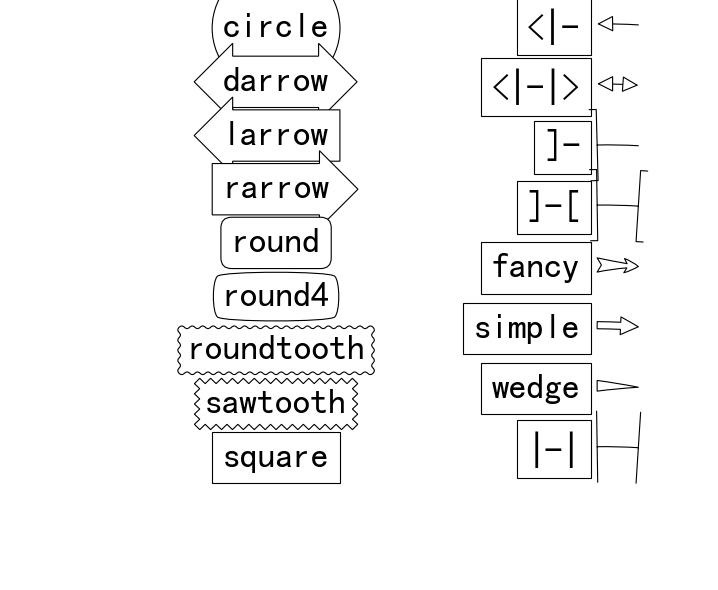

In [9]:
#Whats New 0.98.4 Fancy
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt

figheight = 8
fig = plt.figure(1, figsize=(9, figheight), dpi=80)
fontsize = 0.4 * fig.dpi

def make_boxstyles(ax):
    styles = mpatch.BoxStyle.get_styles()

    for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
        ax.text(0.5, (float(len(styles)) - 0.5 - i)/len(styles), stylename,
                  ha="center",
                  size=fontsize,
                  transform=ax.transAxes,
                  bbox=dict(boxstyle=stylename, fc="w", ec="k"))

def make_arrowstyles(ax):
    styles = mpatch.ArrowStyle.get_styles()

    ax.set_xlim(0, 4)
    ax.set_ylim(0, figheight)

    for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
        y = (float(len(styles)) -0.25 - i) # /figheight
        p = mpatch.Circle((3.2, y), 0.2, fc="w")
        ax.add_patch(p)

        ax.annotate(stylename, (3.2, y),
                    (2., y),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=fontsize,
                    arrowprops=dict(arrowstyle=stylename,
                                    patchB=p,
                                    shrinkA=5,
                                    shrinkB=5,
                                    fc="w", ec="k",
                                    connectionstyle="arc3,rad=-0.05",
                                    ),
                    bbox=dict(boxstyle="square", fc="w"))

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)


ax1 = fig.add_subplot(121, frameon=False, xticks=[], yticks=[])
make_boxstyles(ax1)

ax2 = fig.add_subplot(122, frameon=False, xticks=[], yticks=[])
make_arrowstyles(ax2)


plt.show()

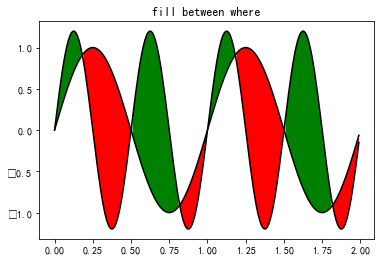

In [10]:
#Whats New 0.98.4 Fill Between
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2>y1, facecolor='green')
ax.fill_between(x, y1, y2, where=y2<=y1, facecolor='red')
ax.set_title('fill between where')

plt.show()


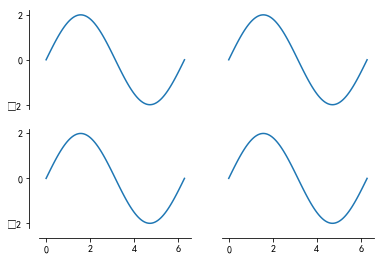

In [11]:
#Whats New 0.99 Spines
import matplotlib.pyplot as plt
import numpy as np


def adjust_spines(ax,spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward',10)) # outward by 10 points
        else:
            spine.set_color('none') # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

fig = plt.figure()

x = np.linspace(0,2*np.pi,100)
y = 2*np.sin(x)

ax = fig.add_subplot(2,2,1)
ax.plot(x,y)
adjust_spines(ax,['left'])

ax = fig.add_subplot(2,2,2)
ax.plot(x,y)
adjust_spines(ax,[])

ax = fig.add_subplot(2,2,3)
ax.plot(x,y)
adjust_spines(ax,['left','bottom'])

ax = fig.add_subplot(2,2,4)
ax.plot(x,y)
adjust_spines(ax,['bottom'])

plt.show()

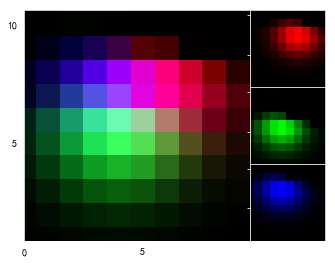

In [12]:
#Whats New 0.99 Axes Grid
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_rgb import RGBAxes

def get_demo_image():
    # prepare image
    delta = 0.5

    extent = (-3,4,-4,3)
    x = np.arange(-3.0, 4.001, delta)
    y = np.arange(-4.0, 3.001, delta)
    X, Y = np.meshgrid(x, y)
    import matplotlib.mlab as mlab
    Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    Z = (Z1 - Z2) * 10

    return Z, extent



def get_rgb():
    Z, extent = get_demo_image()

    Z[Z<0] = 0.
    Z = Z/Z.max()

    R = Z[:13,:13]
    G = Z[2:,2:]
    B = Z[:13,2:]

    return R, G, B


fig = plt.figure(1)
ax = RGBAxes(fig, [0.1, 0.1, 0.8, 0.8])

r, g, b = get_rgb()
kwargs = dict(origin="lower", interpolation="nearest")
ax.imshow_rgb(r, g, b, **kwargs)

ax.RGB.set_xlim(0., 9.5)
ax.RGB.set_ylim(0.9, 10.6)


plt.draw()
plt.show()

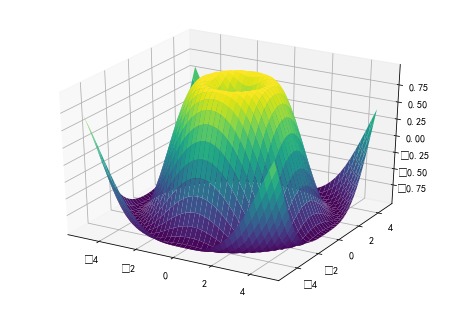

In [13]:
#Whats New 0.99 Mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

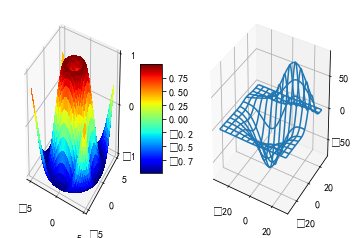

In [14]:
#Whats New 1 Subplot3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

#ax.w_zaxis.set_major_locator(LinearLocator(10))
#ax.w_zaxis.set_major_formatter(FormatStrFormatter('%.03f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

from mpl_toolkits.mplot3d.axes3d import get_test_data
ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()